In [3]:
!pip install pygame
!pip install numpy
!pip install scipy

     --------------------------------------- 10.8/10.8 MB 25.2 MB/s eta 0:00:00


In [2]:
import pygame
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
# Constants
g = 9.81
ve = 3100
mdot = -2100
b = 0.1
ti = 0
tf = 1000
t = np.linspace(ti, tf, 200)

# Function to define the rocket dynamics
def f(x, t):
    m, y, v = x
    if m > mcohete:
        dxdt = v
        dvdt = -mdot/m*ve - g - b*(v**2)/m
        dmdt = mdot
    else:
        dxdt = v
        dvdt = - g - b*(v**2)/mcohete
        dmdt = 0
    if (dvdt < 0) and (dxdt < 0) and (y <= 0):
        dxdt = 0
        dvdt = 0
    return [dmdt, dxdt, dvdt]

# Initial conditions
m0 = 525000
mf = 500000
mcohete = m0 - mf
y0 = 0
v0 = 0
x0 = [m0, y0, v0]

# Integration
X = odeint(f, x0, t)

# Initial conditions
m0 = 525000
mf = 500000
mcohete = m0 - mf
y0 = 0
v0 = 0
x0 = [m0, y0, v0]

# Integration
X = odeint(f, x0, t)

# Pygame setup
pygame.init()
screen_width = 1000
screen_height = 600
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption("Rocket Animation")
clock = pygame.time.Clock()

# Rocket properties
rocket_width = 20
rocket_height = 40
rocket_color = (255, 0, 0)

# Earth properties
earth_color = (0, 51, 0)
earth_line_height = 2

# Function to draw the rocket and Earth line with camera following the rocket
def draw_rocket(y):
    rocket_x = screen_width // 2 - rocket_width // 2
    rocket_y = screen_height - y - rocket_height

    # Calculate camera position to center it on the rocket
    camera_x = rocket_x - screen_width // 2
    camera_y = rocket_y - screen_height // 2

    # Adjust rocket position based on camera
    rocket_x -= camera_x
    rocket_y -= camera_y
    # Adjust Earth line position based on camera
    earth_line_y = screen_height - earth_line_height - camera_y

    pygame.draw.rect(screen, rocket_color, (rocket_x, rocket_y, rocket_width, rocket_height))
    pygame.draw.line(screen, earth_color, (0, earth_line_y), (screen_width, earth_line_y))


# Function to draw graphs
def draw_graphs(altitude, velocity):
    plt.figure(figsize=(3, 6))

    plt.subplot(2, 1, 1)
    plt.plot(t[:index], X[:index, 1])
    plt.scatter(t[index], altitude, color='red')  # Show current altitude
    plt.title('Altitude vs Time')
    plt.xlabel('Time')
    plt.ylabel('Altitude')
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot(t[:index], X[:index, 2])
    plt.scatter(t[index], velocity, color='red')  # Show current velocity
    plt.title('Velocity vs Time')
    plt.xlabel('Time')
    plt.ylabel('Velocity')
    plt.grid(True)

    plt.tight_layout()

    # Convert plot to pygame surface
    plt.savefig('graphs.png')
    plt.close()

    graphs_surface = pygame.image.load('graphs.png')
    screen.blit(graphs_surface, (screen_width - 300, 0))

# Main loop

bg = pygame.image.load("background.jpg")
running = True
index = 0
while running:
    screen.fill((0, 0, 0))
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
    screen.blit(bg, (0, 0))
    # Update rocket position based on altitude
    altitude = X[index, 1]
    velocity = X[index, 2]
    draw_rocket(altitude)
    
    # Draw graphs
    draw_graphs(altitude, velocity)

    pygame.display.flip()
    clock.tick(120)

    # Update index for next frame
    index += 1
    if index >= len(X):
        running = False

pygame.quit()

SystemExit: 

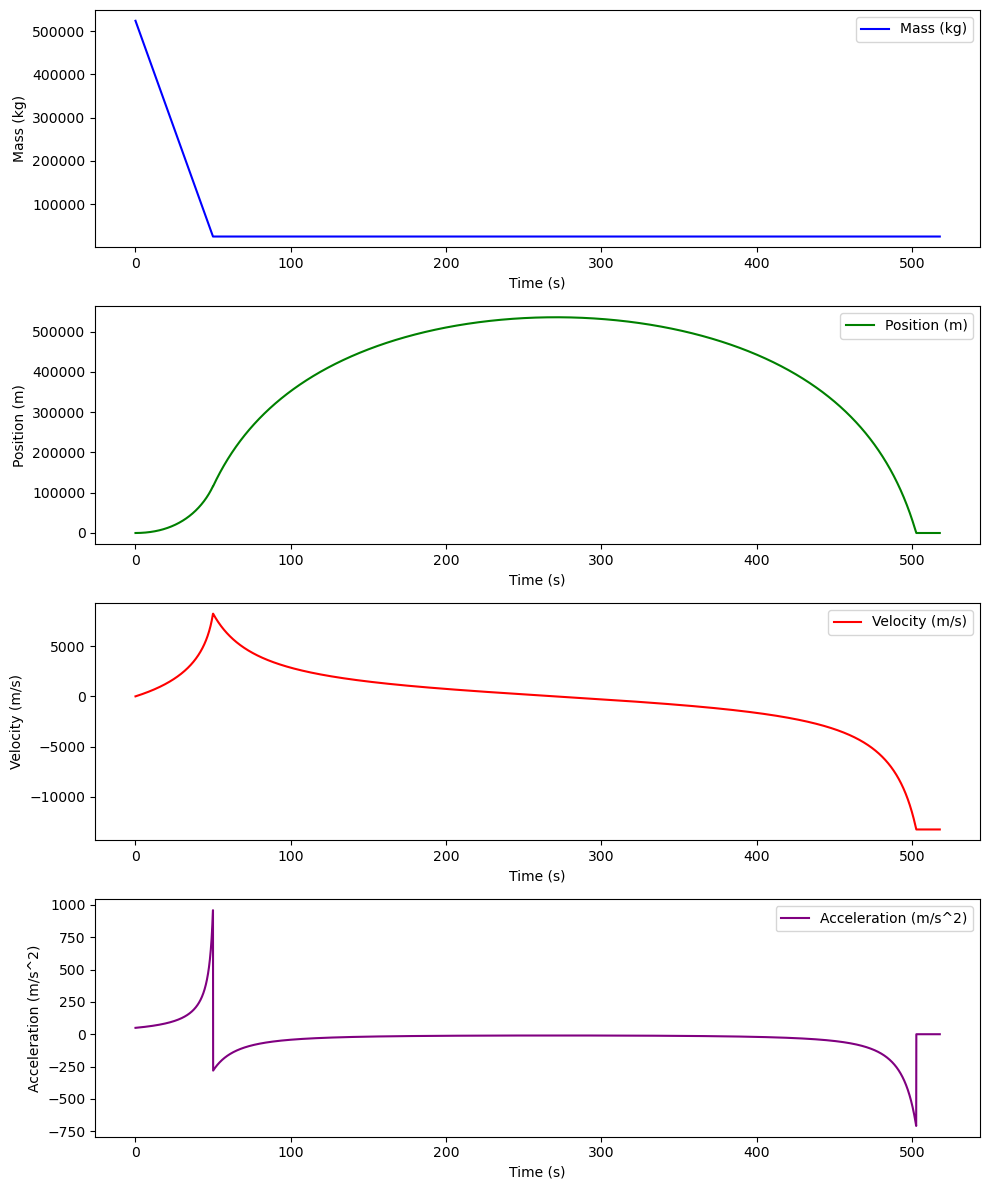

SystemExit: 

In [6]:
import pygame
import numpy as np
from scipy.integrate import odeint
import sys
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# Initialize Pygame
pygame.init()

# Screen dimensions
width, height = 800, 600
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Rocket Simulation")

# Colors
black = (0, 0, 0)
white = (255, 255, 255)
red = (255, 0, 0)
blue = (0, 0, 255)

# Font
font = pygame.font.SysFont(None, 24)

# Rocket class
class Rocket:
    def __init__(self, m0, mf, ve, mdot, b):
        self.m0 = m0
        self.mf = mf
        self.ve = ve
        self.mdot = mdot
        self.b = b
        self.mcohete = m0 - mf
        self.x0 = [m0, 0, 0]
        self.g = 9.81
        self.time_elapsed = 0
        self.dt = 0.1
        self.trail = []
        self.max_height = 0

        # Lists to store data for plotting
        self.times = []
        self.masses = []
        self.positions = []
        self.velocities = []
        self.accelerations = []

    def f(self, x, t):
        m, y, v = x
        if m > self.mcohete:
            dmdt = self.mdot
            dvdt = (-self.mdot * self.ve - self.g * m - self.b * v**2) / m
        else:
            dmdt = 0
            dvdt = -self.g - self.b * v**2 / self.mcohete

        dxdt = v

        if dvdt < 0 and dxdt < 0 and y <= 0:
            dxdt = 0
            dvdt = 0

        return [dmdt, dxdt, dvdt]

    def update(self, dt):
        t = np.linspace(0, dt, 2)
        self.x0 = odeint(self.f, self.x0, t)[-1]
        self.trail.append((self.time_elapsed, self.x0[1]))
        self.time_elapsed += dt
        if self.x0[1] > self.max_height:
            self.max_height = self.x0[1]

        # Append data for plotting
        self.times.append(self.time_elapsed)
        self.masses.append(self.x0[0])
        self.positions.append(self.x0[1])
        self.velocities.append(self.x0[2])
        self.accelerations.append(self.f(self.x0, 0)[2])

    def draw(self, screen):
        max_display_height = max(self.max_height, height)
        scale = height / (max_display_height + 100)  # Add some margin

        y_screen = height - int(self.x0[1] * scale)
        pygame.draw.circle(screen, red, (width // 2, y_screen), 10)

        for time, pos in self.trail[-500:]:
            y_trail = height - int(pos * scale)
            pygame.draw.circle(screen, blue, (width // 2, y_trail), 2)

def plot_graphs(times, masses, positions, velocities, accelerations):
    fig, axs = plt.subplots(4, 1, figsize=(10, 12))

    axs[0].plot(times, masses, label='Mass (kg)', color='blue')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Mass (kg)')
    axs[0].legend()

    axs[1].plot(times, positions, label='Position (m)', color='green')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Position (m)')
    axs[1].legend()

    axs[2].plot(times, velocities, label='Velocity (m/s)', color='red')
    axs[2].set_xlabel('Time (s)')
    axs[2].set_ylabel('Velocity (m/s)')
    axs[2].legend()

    axs[3].plot(times, accelerations, label='Acceleration (m/s^2)', color='purple')
    axs[3].set_xlabel('Time (s)')
    axs[3].set_ylabel('Acceleration (m/s^2)')
    axs[3].legend()

    fig.tight_layout()
    return fig

def main():
    # Default rocket parameters
    m0 = 525000      # initial mass (kg)
    mf = 500000      # fuel mass (kg)
    ve = 3100        # exhaust velocity (m/s)
    mdot = -10000     # mass flow rate (kg/s)
    b = 0.1          # drag coefficient

    # Create Rocket instance
    rocket = Rocket(m0, mf, ve, mdot, b)

    running = True
    clock = pygame.time.Clock()

    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

        screen.fill(black)

        # Update and draw the rocket
        rocket.update(rocket.dt)
        rocket.draw(screen)

        # Display parameters
        params_text = f"m0: {m0} kg, mf: {mf} kg, ve: {ve} m/s, mdot: {mdot} kg/s, b: {b}"
        text = font.render(params_text, True, white)
        screen.blit(text, (10, 10))

        pygame.display.flip()
        clock.tick(60)

    # Plot graphs after the simulation ends
    fig = plot_graphs(rocket.times, rocket.masses, rocket.positions, rocket.velocities, rocket.accelerations)
    plt.show()

    pygame.quit()
    sys.exit()

if __name__ == "__main__":
    main()


# Este es el chever

In [7]:
import pygame
import numpy as np
from scipy.integrate import odeint
import sys
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvasAgg

# Initialize Pygame
pygame.init()

# Screen dimensions
width, height = 1000, 800  # Increase width to accommodate graphs
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Rocket Simulation with Real-Time Graphs")

# Colors
black = (0, 0, 0)
white = (255, 255, 255)
red = (255, 0, 0)
blue = (0, 0, 255)
grey = (100, 100, 100)

# Font
font = pygame.font.SysFont(None, 24)

# Load background image
background = pygame.image.load('background.jpg')  # Make sure to have a background image in the same directory
background = pygame.transform.scale(background, (width // 2, height))  # Scale background to half the screen width

# Rocket class
class Rocket:
    def __init__(self, m0, mf, ve, mdot, b):
        self.m0 = m0
        self.mf = mf
        self.ve = ve
        self.mdot = mdot
        self.b = b
        self.mcohete = m0 - mf
        self.x0 = [m0, 0, 0]
        self.g = 9.81
        self.time_elapsed = 0
        self.dt = 1
        self.trail = []
        self.max_height = 0

        # Lists to store data for plotting
        self.times = []
        self.masses = []
        self.positions = []
        self.velocities = []
        self.accelerations = []

    def f(self, x, t):
        m, y, v = x
        if m > self.mcohete:
            dmdt = self.mdot
            dvdt = (-self.mdot * self.ve - self.g * m - self.b * v**2) / m
        else:
            dmdt = 0
            dvdt = -self.g - self.b * v**2 / self.mcohete

        dxdt = v

        if dvdt < 0 and dxdt < 0 and y <= 0:
            dxdt = 0
            dvdt = 0

        return [dmdt, dxdt, dvdt]

    def update(self, dt):
        t = np.linspace(0, dt, 2)
        self.x0 = odeint(self.f, self.x0, t)[-1]
        self.trail.append((self.time_elapsed, self.x0[1]))
        self.time_elapsed += dt
        if self.x0[1] > self.max_height:
            self.max_height = self.x0[1]

        # Append data for plotting
        self.times.append(self.time_elapsed)
        self.masses.append(self.x0[0])
        self.positions.append(self.x0[1])
        self.velocities.append(self.x0[2])
        self.accelerations.append(self.f(self.x0, 0)[2])

    def draw(self, screen):
        max_display_height = max(self.max_height, height)
        scale = height / (max_display_height + 100)  # Add some margin

        y_screen = height - int(self.x0[1] * scale)
        pygame.draw.circle(screen, red, (width // 4, y_screen), 10)

        for time, pos in self.trail[-500:]:
            y_trail = height - int(pos * scale)
            pygame.draw.circle(screen, blue, (width // 4, y_trail), 2)

def draw_graph(screen, fig, rect):
    canvas = FigureCanvasAgg(fig)
    plt.close(fig)
    canvas.draw()
    raw_data = canvas.buffer_rgba()
    graph_surface = pygame.image.frombuffer(raw_data, canvas.get_width_height(), "RGBA")
    screen.blit(graph_surface, rect)

def plot_graphs(times, masses, positions, velocities, accelerations):
    fig, axs = plt.subplots(4, 1, figsize=(5, 8), dpi=100)

    axs[0].plot(times, masses, label='Mass (kg)', color='blue')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Mass (kg)')
    axs[0].legend()

    axs[1].plot(times, positions, label='Position (m)', color='green')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Position (m)')
    axs[1].legend()

    axs[2].plot(times, velocities, label='Velocity (m/s)', color='red')
    axs[2].set_xlabel('Time (s)')
    axs[2].set_ylabel('Velocity (m/s)')
    axs[2].legend()

    axs[3].plot(times, accelerations, label='Acceleration (m/s^2)', color='purple')
    axs[3].set_xlabel('Time (s)')
    axs[3].set_ylabel('Acceleration (m/s^2)')
    axs[3].legend()

    fig.tight_layout()
    return fig

def main():
    # Default rocket parameters
    m0 = 525000      # initial mass (kg)
    mf = 500000      # fuel mass (kg)
    ve = 3100        # exhaust velocity (m/s)
    mdot = -2100     # mass flow rate (kg/s)
    b = 0.1          # drag coefficient

    # Create Rocket instance
    rocket = Rocket(m0, mf, ve, mdot, b)

    running = True
    clock = pygame.time.Clock()

    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

        screen.fill(black)

        # Update and draw the rocket
        rocket.update(rocket.dt)

        # Draw background
        bg_y = height - int(rocket.x0[1] / 10) % height
        screen.blit(background, (0, bg_y - height))
        screen.blit(background, (0, bg_y))

        # Draw the floor
        pygame.draw.rect(screen, grey, (0, height - 20, width // 2, 20))

        rocket.draw(screen)

        # Plot graphs
        
        #borrar graficas 
        fig = plot_graphs(rocket.times, rocket.masses, rocket.positions, rocket.velocities, rocket.accelerations)
        draw_graph(screen, fig, (width // 2, 0))

        # Display parameters
        params_text = f"m0: {m0} kg, mf: {mf} kg, ve: {ve} m/s, mdot: {mdot} kg/s, b: {b}"
        text = font.render(params_text, True, white)
        screen.blit(text, (10, 10))

        pygame.display.flip()
        clock.tick(60)

    pygame.quit()
    sys.exit()

if __name__ == "__main__":
    main()


SystemExit: 